# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('bike_sharing_dataset.csv')

data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,days_since_2011,cnt
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,0,985
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,1,801
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,2,1349
3,SPRING,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,3,1562
4,SPRING,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,4,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,SPRING,2012,DEZ,NO HOLIDAY,THU,WORKING DAY,MISTY,3.945849,65.2917,23.458911,726,2114
727,SPRING,2012,DEZ,NO HOLIDAY,FRI,WORKING DAY,MISTY,3.906651,59.0000,10.416557,727,3095
728,SPRING,2012,DEZ,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661,728,1341
729,SPRING,2012,DEZ,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518,729,1796


In [3]:
data.drop(['days_since_2011'], axis=1, inplace=True)

data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349
3,SPRING,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562
4,SPRING,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,SPRING,2012,DEZ,NO HOLIDAY,THU,WORKING DAY,MISTY,3.945849,65.2917,23.458911,2114
727,SPRING,2012,DEZ,NO HOLIDAY,FRI,WORKING DAY,MISTY,3.906651,59.0000,10.416557,3095
728,SPRING,2012,DEZ,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661,1341
729,SPRING,2012,DEZ,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518,1796


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    object 
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    object 
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 62.9+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [5]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [6]:
data.describe()

,yr,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2011.500684,15.283085,62.789406,12.762576,4504.348837
std,0.500342,8.603397,14.242910,5.192357,1937.211452
min,2011.000000,-5.220871,0.000000,1.500244,22.000000
25%,2011.000000,7.842925,52.000000,9.041650,3152.000000
50%,2012.000000,15.421651,62.666700,12.125325,4548.000000
75%,2012.000000,22.804575,73.020850,15.625371,5956.000000
max,2012.000000,32.498349,97.250000,34.000021,8714.000000


### 3.2.2. Remove Outliers

In [7]:
# no outlier to remove

# 4. Split Dataset into Training & Test Set

In [8]:
target_name = 'cnt'
feature_name = list(data.columns.drop(target_name))

In [9]:
X = data[feature_name]
y = data[target_name]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [11]:
X_test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
533,SUMMER,2012,JUN,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,19.847500,59.8750,9.708568
626,FALL,2012,SEP,NO HOLIDAY,TUE,WORKING DAY,MISTY,21.296651,87.2500,23.958329
516,SUMMER,2012,MAY,NO HOLIDAY,THU,WORKING DAY,GOOD,23.960000,49.2917,13.083693
625,FALL,2012,SEP,NO HOLIDAY,MON,WORKING DAY,MISTY,19.299151,73.4583,10.166714
535,SUMMER,2012,JUN,NO HOLIDAY,TUE,WORKING DAY,GOOD,24.351651,69.0000,9.917139
...,...,...,...,...,...,...,...,...,...,...
449,SUMMER,2012,MAR,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,12.562500,88.0833,14.791925
429,SPRING,2012,MAR,NO HOLIDAY,MON,WORKING DAY,GOOD,3.436651,50.6250,15.333486
266,WINTER,2011,SEP,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,20.513349,86.2500,5.251681
57,SPRING,2011,FEB,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,8.143466,68.0000,8.391616


# 5. Data Preparation

In [12]:
numerical_feature = ['yr', 'temp', 'hum', 'windspeed']
categorical_feature = [f for f in feature_name if f not in numerical_feature]

In [13]:
print('numerical_feature :', numerical_feature)
print('categorical feature :', categorical_feature)

numerical_feature : ['yr', 'temp', 'hum', 'windspeed']
categorical feature : ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [14]:
# cycle ==> nominal feature ==> one hot encoding

In [15]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

season : ['FALL' 'SPRING' 'SUMMER' 'WINTER']
mnth : ['APR' 'AUG' 'DEZ' 'FEB' 'JAN' 'JUL' 'JUN' 'MAR' 'MAY' 'NOV' 'OKT' 'SEP']
holiday : ['HOLIDAY' 'NO HOLIDAY']
weekday : ['FRI' 'MON' 'SAT' 'SUN' 'THU' 'TUE' 'WED']
workingday : ['NO WORKING DAY' 'WORKING DAY']
weathersit : ['GOOD' 'MISTY' 'RAIN/SNOW/STORM']


In [16]:
ordinal_feature = []
nominal_feature = list(categorical_feature)

## ### 5.1 Ordinal Encoding

## 5.2. One Hot Encoding

In [17]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
147,SUMMER,2011,MAY,NO HOLIDAY,SAT,NO WORKING DAY,GOOD,22.824151,72.9583,15.416164
416,SPRING,2012,FEB,NO HOLIDAY,TUE,WORKING DAY,GOOD,5.527822,59.4348,13.783039
706,WINTER,2012,DEZ,NO HOLIDAY,FRI,WORKING DAY,MISTY,7.079151,76.4167,8.750200
471,SUMMER,2012,APR,HOLIDAY,MON,NO WORKING DAY,GOOD,23.215849,56.1667,19.083543
567,FALL,2012,JUL,NO HOLIDAY,SAT,NO WORKING DAY,RAIN/SNOW/STORM,20.004151,86.5417,14.291100
...,...,...,...,...,...,...,...,...,...,...
420,SPRING,2012,FEB,NO HOLIDAY,SAT,NO WORKING DAY,GOOD,5.669151,39.5833,28.250014
129,SUMMER,2011,MAY,NO HOLIDAY,TUE,WORKING DAY,GOOD,17.027500,48.9167,7.749957
285,WINTER,2011,OKT,NO HOLIDAY,THU,WORKING DAY,MISTY,19.690849,89.6667,9.499729
485,SUMMER,2012,APR,NO HOLIDAY,MON,WORKING DAY,MISTY,13.815849,57.0000,11.499746


### 5.2.1. Traning Set

In [18]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [19]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [20]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

In [21]:
X_train

,yr,temp,hum,windspeed,season_FALL,season_SPRING,season_SUMMER,season_WINTER,mnth_APR,mnth_AUG,...,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,workingday_NO WORKING DAY,workingday_WORKING DAY,weathersit_GOOD,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
147,2011,22.824151,72.9583,15.416164,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
416,2012,5.527822,59.4348,13.783039,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
706,2012,7.079151,76.4167,8.750200,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
471,2012,23.215849,56.1667,19.083543,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
567,2012,20.004151,86.5417,14.291100,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2012,5.669151,39.5833,28.250014,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
129,2011,17.027500,48.9167,7.749957,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
285,2011,19.690849,89.6667,9.499729,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
485,2012,13.815849,57.0000,11.499746,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### 5.2.2. Test Set

In [22]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

In [23]:
X_test

,yr,temp,hum,windspeed,season_FALL,season_SPRING,season_SUMMER,season_WINTER,mnth_APR,mnth_AUG,...,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,workingday_NO WORKING DAY,workingday_WORKING DAY,weathersit_GOOD,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
533,2012,19.847500,59.8750,9.708568,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
626,2012,21.296651,87.2500,23.958329,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
516,2012,23.960000,49.2917,13.083693,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
625,2012,19.299151,73.4583,10.166714,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
535,2012,24.351651,69.0000,9.917139,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,2012,12.562500,88.0833,14.791925,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
429,2012,3.436651,50.6250,15.333486,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
266,2011,20.513349,86.2500,5.251681,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
57,2011,8.143466,68.0000,8.391616,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## 5.3. Feature Scaling

### 5.3.1. Training Set

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [25]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [26]:
kernel = RBF(length_scale=1)
reg = GaussianProcessRegressor(kernel=kernel)

## 6.2. Train Model

In [27]:
reg.fit(X_train_scaled, y_train)

GaussianProcessRegressor(kernel=RBF(length_scale=1))

# 7. Prediction

## 7.1. Training Set

In [28]:
y_pred_train, sd_train = reg.predict(X_train_scaled, return_std=True)

## 7.2. Test Set

In [29]:
y_pred_test, sd_test = reg.predict(X_test_scaled, return_std=True)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [30]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 1.0
mean_squared_error =		 2.6512795359616104e-11
mean_absolute_error =		 9.833256163421712e-07
mean_absolute_percentage_error = 2.075887770600734e-10


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

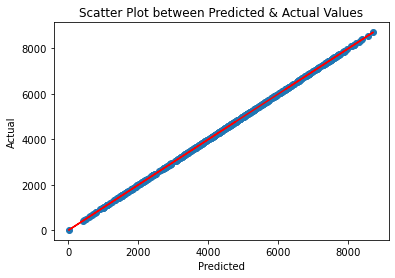

In [31]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [32]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.5277123074494288
mean_squared_error =		 1740156.351791461
mean_absolute_error =		 878.0823319466057
mean_absolute_percentage_error = 0.22063207881013636


### 8.2.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

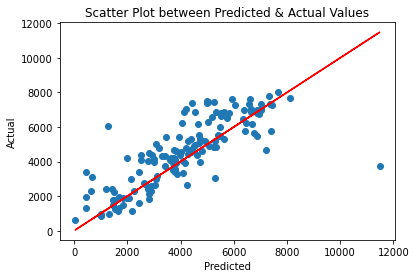

In [33]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [34]:
import pickle

In [35]:
pickle.dump((reg, 
             one_hot_encoder, 
             scaler, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature), 
            open('bike_sharing_model.pickle', 'wb'))